In [145]:
import pandas as pd
from matplotlib import pyplot as plt
import math

## Show AC signals (1V 1kHz and 1V 500Hz)

In [146]:
df = pd.DataFrame()

for i in range(20):
    df1 = pd.read_csv(f"AC_test_1V_1kHz_1v_100Hz/BATCH_{i}.CSV", engine='python')
    df = pd.concat([df, df1], ignore_index = True)

In [147]:
df

,batch,time,explosion,audio,pressure,acceleration,delta_audio
0,0.0,0,0,256,57,405,d = 0
1,0.0,0,1,765,126,508,d = 509
2,0.0,0,1,1069,194,521,d = 304
3,0.0,0,1,1203,268,522,d = 134
4,0.0,0,1,861,369,593,d = 0
...,...,...,...,...,...,...,...
199995,NaN,199,0,0,374,669,d = 0
199996,NaN,199,0,0,318,0,d = 0
199997,NaN,199,0,0,255,0,d = 0
199998,NaN,199,0,0,88,0,d = 0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batch         10000 non-null   float64
 1   time          200000 non-null  int64  
 2   explosion     200000 non-null  int64  
 3   audio         200000 non-null  int64  
 4   pressure      200000 non-null  int64  
 5   acceleration  200000 non-null  int64  
 6   delta_audio   200000 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 10.7+ MB


In [149]:
audio_data = df['audio'].tolist()

print("Number of audio data data points:", len(audio_data))

Number of audio data data points: 200000


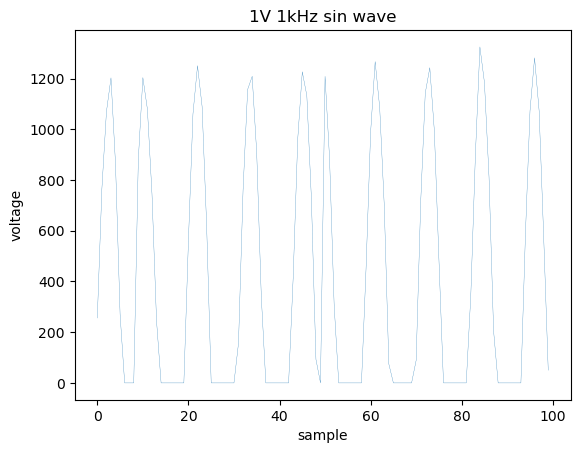

In [150]:
fig, ax = plt.subplots()

ax.set_title("1V 1kHz sin wave")
plt.xlabel("sample")
plt.ylabel("voltage")

ax.plot(range(100), audio_data[0:100], linewidth=.2)

In [151]:
pressure_data = df['pressure'].tolist()

print("Number of pressure data points:", len(pressure_data))

Number of pressure data points: 200000


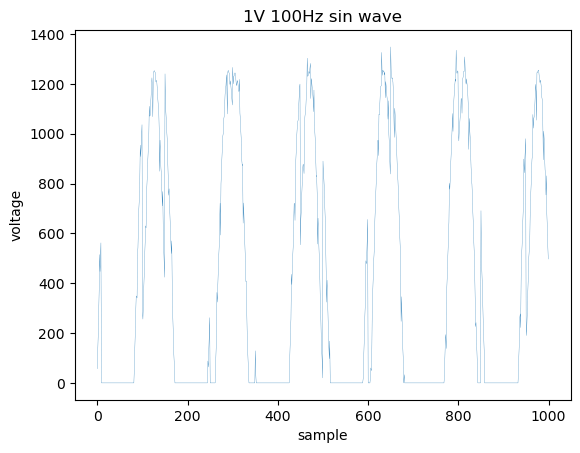

In [152]:
fig, ax = plt.subplots()

ax.set_title("1V 100Hz sin wave")
plt.xlabel("sample")
plt.ylabel("voltage")

ax.plot(range(1000), pressure_data[0:1000], linewidth=.2)

## Confirm DC voltage readings (1V DC and 500mV DC)

In [153]:
df = pd.DataFrame()

for i in range(10):
    df1 = pd.read_csv(f"DC_voltage_test_1V_500mV/DC_{i}.CSV", engine='python')
    df = pd.concat([df, df1], ignore_index = True)

In [154]:
df

,batch,time,explosion,audio,pressure,acceleration,delta_audio
0,0.0,0,0,1257,645,724,d = 0
1,0.0,0,0,1260,644,737,d = 3
2,0.0,0,0,1265,650,738,d = 5
3,0.0,0,0,1269,648,740,d = 4
4,0.0,0,1,1267,606,792,d = 0
...,...,...,...,...,...,...,...
99995,NaN,199,0,1265,602,793,d = 0
99996,NaN,199,1,1269,648,775,d = 4
99997,NaN,199,0,1263,651,764,d = 0
99998,NaN,199,0,1195,649,761,d = 0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batch         10000 non-null   float64
 1   time          100000 non-null  int64  
 2   explosion     100000 non-null  int64  
 3   audio         100000 non-null  int64  
 4   pressure      100000 non-null  int64  
 5   acceleration  100000 non-null  int64  
 6   delta_audio   100000 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ MB


In [156]:
audio_data = df['audio'].tolist()

print("Number of audio data points:", len(audio_data))

Number of audio data points: 100000


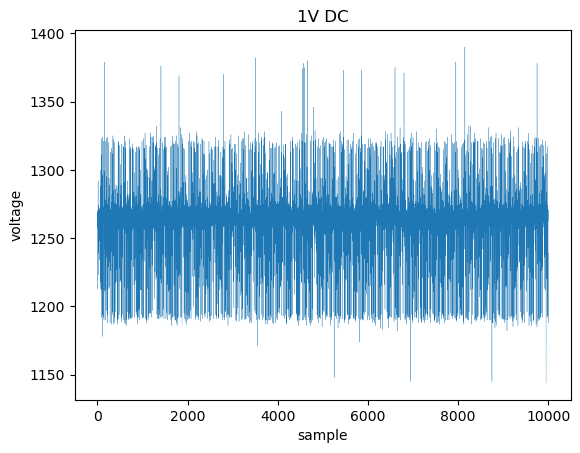

In [157]:
fig, ax = plt.subplots()

ax.set_title("1V DC")
plt.xlabel("sample")
plt.ylabel("voltage")

ax.plot(range(10000), audio_data[0:10000], linewidth=.2)

In [158]:
pressure_data = df['pressure'].tolist()

print("Number of pressure data points:", len(pressure_data))

Number of pressure data points: 100000


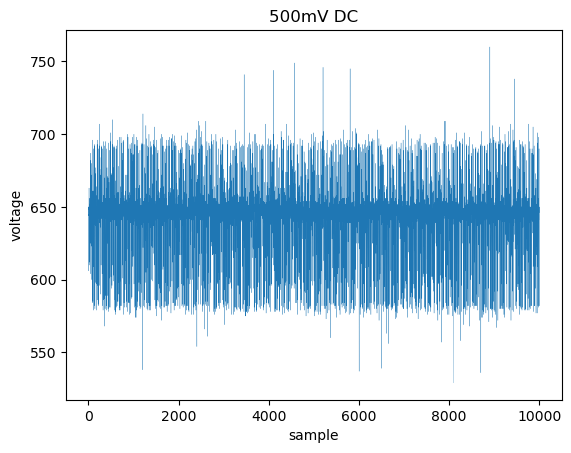

In [159]:
fig, ax = plt.subplots()

ax.set_title("500mV DC")
plt.xlabel("sample")
plt.ylabel("voltage")

ax.plot(range(10000), pressure_data[0:10000], linewidth=.2)

In [160]:
df.describe()

,batch,time,explosion,audio,pressure,acceleration
count,10000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.0,99.500000,0.237520,1262.969680,643.769680,759.258670
std,0.0,57.734594,0.425566,24.848354,23.293029,24.855555
min,0.0,0.000000,0.000000,1139.000000,526.000000,699.000000
25%,0.0,49.750000,0.000000,1261.000000,642.000000,741.000000
50%,0.0,99.500000,0.000000,1265.000000,646.000000,756.000000
75%,0.0,149.250000,0.000000,1269.000000,650.000000,776.000000
max,0.0,199.000000,1.000000,1390.000000,760.000000,858.000000


## Validate reading from acceleration sensor (mangitude of x and y) with conversion to (g)

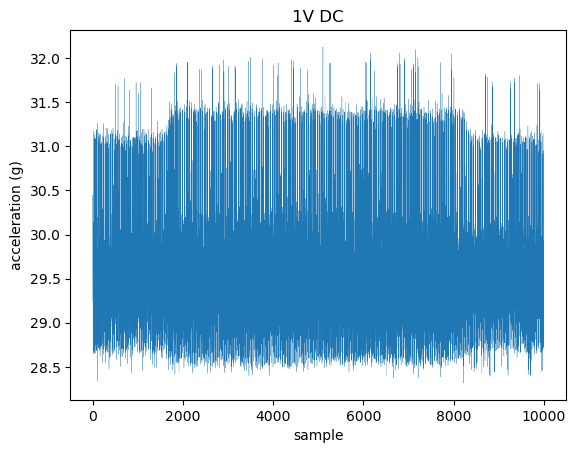

In [161]:
df = pd.DataFrame()

for i in range(10):
    df1 = pd.read_csv(f"x_and_y_acceleration/BATCH_{i}.CSV", engine='python')
    df = pd.concat([df, df1], ignore_index = True)

acceleration_data = df['acceleration'].tolist()

fig, ax = plt.subplots()

ax.set_title("1V DC")
plt.xlabel("sample")
plt.ylabel("acceleration (g)")

ax.plot(range(10000), acceleration_data[0:10000], linewidth=.2)

In [162]:
df.describe()

,batch,time,explosion,audio,pressure,acceleration
count,10000.0,100000.000000,100000.0,100000.000000,100000.000000,100000.000000
mean,0.0,99.500000,0.0,154.580854,66.856854,29.758409
std,0.0,57.734594,0.0,0.143614,1.267134,0.686937
min,0.0,0.000000,0.0,153.994000,62.244000,28.293000
25%,0.0,49.750000,0.0,154.520000,66.005000,29.427000
50%,0.0,99.500000,0.0,154.601000,66.746000,29.772000
75%,0.0,149.250000,0.0,154.675000,67.658000,29.928000
max,0.0,199.000000,0.0,155.015000,71.477000,32.126000


In [163]:
avg_voltage = 1262.97     # average from previous experiment
voltage_conv = 1000/1200
acc_x_ref = 50.00
acc_y_ref = 48.97

calculated_acc = math.sqrt(((avg_voltage*voltage_conv)/acc_x_ref)**2 + ((avg_voltage*voltage_conv)/acc_y_ref)**2)
print(f"Calculated average acceleration: {calculated_acc} g")

measured_acc = df.describe()['acceleration']['mean']
print(f"Measured average acceleration: {measured_acc} g")

percent_diff = (abs(calculated_acc - measured_acc) / ((calculated_acc + measured_acc) / 2)) * 100

print(f"Percent difference: {percent_diff:.3f} %")

Calculated average acceleration: 30.083181959153798 g
Measured average acceleration: 29.758409059999995 g
Percent difference: 1.085 %


## Validate reading from microphone and pressure sensor with conversion to (dB) and (kPa)

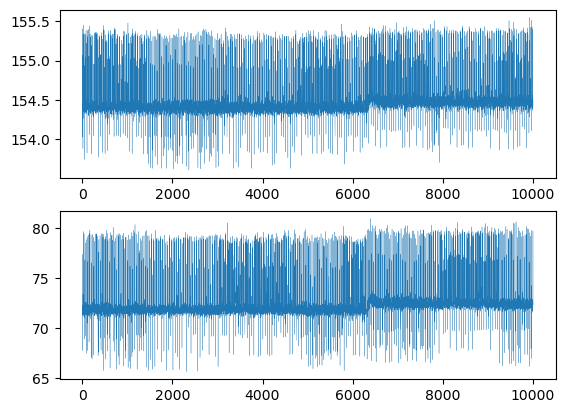

In [164]:
df = pd.DataFrame()

for i in range(10):
    df1 = pd.read_csv(f"audio_and_pressure/BATCH_{i}.CSV", engine='python')
    df = pd.concat([df, df1], ignore_index = True)

df

audio_data = df['audio'].tolist()
pressure_data = df['pressure'].tolist()

fig, ax = plt.subplots(2)

ax[0].plot(range(10000), audio_data[0:10000], linewidth=.2)

ax[1].plot(range(10000), pressure_data[0:10000], linewidth=.2)

In [165]:
df.describe()

,batch,time,explosion,audio,pressure,acceleration
count,10000.0,100000.000000,100000.0,100000.000000,100000.000000,100000.000000
mean,0.0,99.500000,0.0,154.504054,72.601720,28.058679
std,0.0,57.734594,0.0,0.241541,1.934529,0.755440
min,0.0,0.000000,0.0,153.610000,65.606000,25.780000
25%,0.0,49.750000,0.0,154.431000,71.990000,27.510000
50%,0.0,99.500000,0.0,154.465000,72.275000,28.091000
75%,0.0,149.250000,0.0,154.492000,72.503000,28.565000
max,0.0,199.000000,0.0,155.563000,81.281000,30.054000


In [166]:
avg_voltage = 1262.97     # average from previous experiment
voltage_conv = 1000/1200
audio_ref = 1.00
p_ref = 0.00002
pressure_ref = 14.62



calculated_audio = (avg_voltage*voltage_conv)/audio_ref
calculated_audio = 20*math.log10(calculated_audio/p_ref)

print(f"Calculated average audio: {calculated_audio} dB")

measured_audio = df.describe()['audio']['mean']
print(f"Measured average audio: {measured_audio} dB")

percent_diff = (abs(calculated_audio - measured_audio) / ((calculated_audio + measured_audio) / 2)) * 100

print(f"Percent difference: {percent_diff:.3f} %\n")



calculated_pressure = (avg_voltage*voltage_conv)/pressure_ref
print(f"Calculated average pressure: {calculated_pressure} kPa")

measured_pressure = df.describe()['pressure']['mean']
print(f"Measured average pressure: {measured_pressure} kPa")

percent_diff = (abs(calculated_pressure - measured_pressure) / ((calculated_pressure + measured_pressure) / 2)) * 100

print(f"Percent difference: {percent_diff:.3f} %")

Calculated average audio: 154.4236358587558 dB
Measured average audio: 154.50405382999998 dB
Percent difference: 0.052 %

Calculated average pressure: 71.98871409028729 kPa
Measured average pressure: 72.60172001 kPa
Percent difference: 0.848 %
